In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
# reading the dataset
disease_df = pd.read_csv(r"C:\Users\patel\OneDrive\Desktop\AI\Project\DataSet\dataset.csv")
disease_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [4]:
# getting the statistical information of the datset
disease_df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
cols = disease_df.columns
dt = disease_df[cols].values.flatten()
n = pd.Series(dt)
n = n.str.strip()
n = n.values.reshape(disease_df.shape)

disease_df = pd.DataFrame(n, columns=disease_df.columns)
disease_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

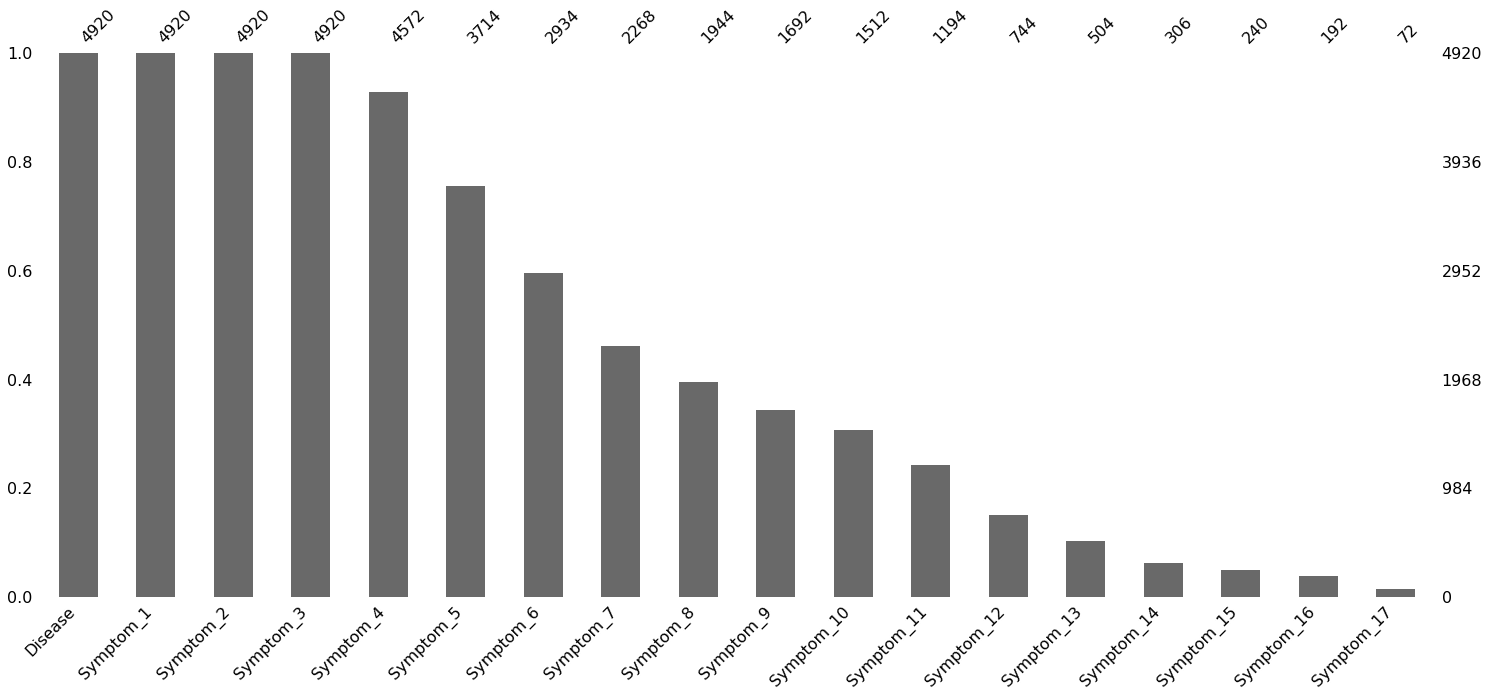

In [6]:
# finding null values
msno.bar(disease_df)

In [7]:
del disease_df['Symptom_8']
del disease_df['Symptom_9']
del disease_df['Symptom_10']
del disease_df['Symptom_11']
del disease_df['Symptom_12']
del disease_df['Symptom_13']
del disease_df['Symptom_14']
del disease_df['Symptom_15']
del disease_df['Symptom_16']
del disease_df['Symptom_17']

In [8]:
disease_df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
count,4920,4920,4920,4920,4572,3714,2934,2268
unique,41,34,48,54,50,38,32,26
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain
freq,120,822,870,726,378,348,390,264


In [9]:
disease_df.shape

(4920, 8)

In [10]:
disease_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN


In [11]:
# filling the null values
disease_df = disease_df.fillna(0)
disease_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0


In [12]:
# finding null values
disease_df.isnull().sum()

Disease      0
Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
Symptom_7    0
dtype: int64

In [13]:
print("No. of unique diseases: ", disease_df['Disease'].nunique())
print("---------------------------------------------------------------------------")
print(disease_df['Disease'].unique())
print("---------------------------------------------------------------------------")

No. of unique diseases:  41
---------------------------------------------------------------------------
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
---------------------------------------------------------------------------


In [14]:
# reading the disease severity file
disease_severity_df = pd.read_csv(r'C:\Users\patel\OneDrive\Desktop\AI\Project\DataSet\Symptom-severity.csv')
disease_severity_df

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [15]:
print("Unique Symptoms: ", disease_severity_df['Symptom'].nunique())
disease_severity_df['Symptom'].unique()

Unique Symptoms:  132


array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [16]:
# mapping the severity of diseases with the disease-symptom dataset 
cols = disease_df.columns
vals = disease_df.values
symptoms = disease_severity_df['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = disease_severity_df[disease_severity_df['Symptom'] == symptoms[i]]['weight'].values[0]
    
merged_df = pd.DataFrame(vals, columns=cols)
merged_df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,dischromic _patches,0,0,0
1,Fungal infection,3,4,dischromic _patches,0,0,0,0
2,Fungal infection,1,4,dischromic _patches,0,0,0,0
3,Fungal infection,1,3,dischromic _patches,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0
...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,5,3,5,6,4,4,0
4916,Acne,3,2,2,2,0,0,0
4917,Urinary tract infection,6,4,foul_smell_of urine,6,0,0,0
4918,Psoriasis,3,3,3,2,2,2,0


In [17]:
merged_df = merged_df.replace('spotting_ urination',0)
merged_df = merged_df.replace('dischromic _patches', 0)
disease_df = merged_df.replace('foul_smell_of urine',0)
disease_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7
0,Fungal infection,1,3,4,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0


<AxesSubplot:>

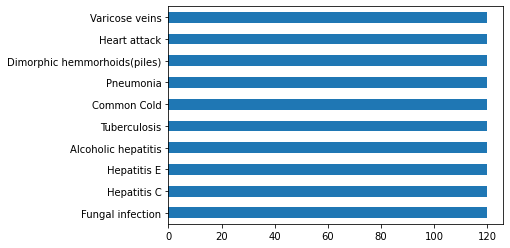

In [18]:
# getting top 10 diseases
disease_df['Disease'].value_counts()[:10].plot(kind='barh')

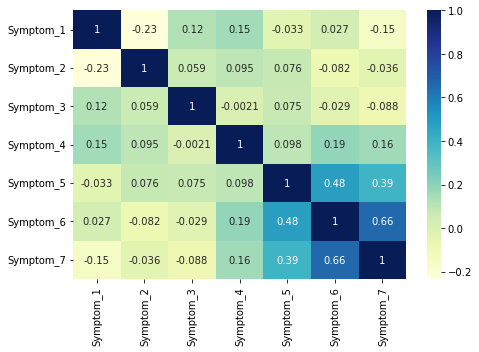

In [19]:
# finding the corelation between the symptoms
plt.figure(figsize=(7,5))
sns.heatmap(disease_df.corr(method='spearman'), cmap="YlGnBu", annot=True)
plt.tight_layout()
plt.show()

In [20]:
# spliting the dataset for training and testing
X = disease_df.iloc[:,1:].values
y = disease_df['Disease']
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.3, random_state = 42)

Text(0, 0.5, 'Mean Error')

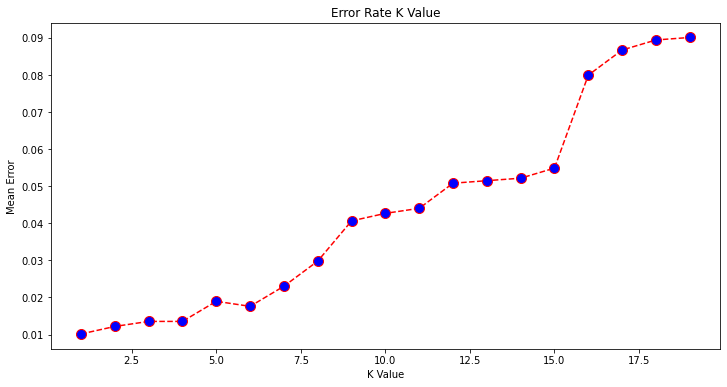

In [21]:
# finding the best value of K 
error = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error.append(np.mean(pred_i != testY))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [22]:
KNNmodel = KNeighborsClassifier(n_neighbors=1)
KNNmodel.fit(trainX, trainY)
y_pred = KNNmodel.predict(testX)
print(classification_report(testY, y_pred)) 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       0.92      1.00      0.96        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      1.00      1.00        44
                   Cervical spondylosis       1.00      0.91      0.95        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00      1.00      1.00        31
                           

In [23]:
print('KNN Model')
print('F1-score: ', round(f1_score(testY, y_pred, average='macro')*100,2),"%")
print('Accuracy: ', round(accuracy_score(y_true=testY, y_pred=y_pred)*100,2),"%")

KNN Model
F1-score:  99.0 %
Accuracy:  98.98 %


In [24]:
SVCModel = SVC(kernel='linear', C = 1.0)
SVCModel.fit(trainX, trainY)
y_pred1 = SVCModel.predict(testX)
print(classification_report(testY, y_pred1)) 

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.94      0.94      0.94        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       0.88      1.00      0.93        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       0.96      0.98      0.97        44
                   Cervical spondylosis       1.00      0.91      0.95        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      0.93      0.97        30
                            Common Cold       1.00      1.00      1.00        31
                           

In [25]:
print('SVC Model')
print('F1-score: ', round(f1_score(testY, y_pred1, average='macro')*100,2),"%")
print('Accuracy: ', round(accuracy_score(y_true=testY, y_pred=y_pred1)*100,2),"%")

SVC Model
F1-score:  96.88 %
Accuracy:  96.88 %


In [26]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  

gridSVCModel = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)
gridSVCModel.fit(trainX, trainY) 
  
print("Best Parameters: ", gridSVCModel.best_params_) 
gscvPredictions = gridSVCModel.predict(testX) 
print(classification_report(testY, gscvPredictions)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters:  {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.94      0.94      0.94        32
                                   AIDS       1.00      1.00      1.00        39
                                   Acne       1.00      1.00      1.00        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       0.88      1.00      0.93        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       0.96      0.98      0.97        44
                   Cervical spondylosis       1.00      0.91      0.95        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      0.93  

In [39]:
print("GridSearchCV Model")
print('F1-score: ', round(f1_score(testY, gscvPredictions, average='macro')*100,2))
print('Accuracy: ',round(accuracy_score(testY,gscvPredictions)*100,2),"%")

GridSearchCV Model
F1-score:  97.0
Accuracy:  97.02 %


In [28]:
knn_accuracy = round(accuracy_score(y_true=testY, y_pred=y_pred)*100,2)
gridsvc_accuracy = round(accuracy_score(testY,gscvPredictions)*100,2)
svc_accuracy = round(accuracy_score(testY,y_pred1)*100,2)

models = pd.DataFrame({
    'Model': ['KNN', 'GridSearchSVC', 'SVC'],
    'Score': [knn_accuracy, gridsvc_accuracy, svc_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,98.98
1,GridSearchSVC,97.02
2,SVC,96.88


In [29]:
# manual predictions
def predictions(S1,S2,S3,S4,S5,S6,S7,x):
    symptomsList = [S1,S2,S3,S4,S5,S6,S7]
    print("Symptoms: ", symptomsList)
    sympts = np.array(disease_severity_df["Symptom"])
    weights = np.array(disease_severity_df["weight"])
    for j in range(len(symptomsList)):
        for k in range(len(sympts)):
            if symptomsList[j]==sympts[k]:
                symptomsList[j]=weights[k]

    psy = [symptomsList]
    return psy

In [30]:
new_df = pd.read_csv(r"C:\Users\patel\OneDrive\Desktop\AI\Project\DataSet\Drug_Recommendation_data.csv")
new_df.head()

,Drug,Rating_Weighted_Avg,Disease,Symptoms,Review,Sentiment,Rating,UsefulCount
0,Cefixime,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""My daughter was born with urinary reflux, the...",Negative,10,7
1,Doribax,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""It is proved itself it is an excellent drug o...",Positive,10,1
2,Doripenem,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""It is proved itself it is an excellent drug o...",Positive,10,1
3,Lactobacillus acidophilus,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""This has been a miracle for me, and it was by...",Negative,10,189
4,Macrodantin,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""Started experiecing pain peeing and went for ...",Positive,10,28


In [31]:
# only considering positive reviews for given the recommendation
new_df = new_df.drop(new_df[new_df['Sentiment'] == "Negative"].index)
new_df = new_df.drop(new_df[new_df['Sentiment'] == "Neutral"].index)
new_df.head()

,Drug,Rating_Weighted_Avg,Disease,Symptoms,Review,Sentiment,Rating,UsefulCount
1,Doribax,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""It is proved itself it is an excellent drug o...",Positive,10,1
2,Doripenem,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""It is proved itself it is an excellent drug o...",Positive,10,1
4,Macrodantin,10.0,urinary tract infection,"[' burning_micturition', ' bladder_discomfort'...","""Started experiecing pain peeing and went for ...",Positive,10,28
6,Flurandrenolide,10.0,psoriasis,"[' skin_rash', ' joint_pain', ' skin_peeling',...","""This is wonderful!! I have psoriasis on all o...",Positive,10,5
8,Topicort,10.0,psoriasis,"[' skin_rash', ' joint_pain', ' skin_peeling',...","""Within 5 days the change in my skin was amazi...",Positive,10,36


In [32]:
# takes the predicted disease as input and recommends drug based on highest weighted average and useful count of ratings
groupedCount = new_df.groupby(['Disease', 'Drug', 'Rating_Weighted_Avg'])['UsefulCount'].sum().reset_index()
groupedCount

,Disease,Drug,Rating_Weighted_Avg,UsefulCount
0,acne,Aldactone,10.000000,87
1,acne,BenzEFoam,10.000000,17
2,acne,Benzoyl peroxide / sulfur,10.000000,3
3,gastroenteritis,Ondansetron,10.000000,68
4,gerd,Axid,10.000000,5
5,gerd,Axid AR,10.000000,5
6,gerd,Calcium carbonate,10.000000,1
7,gerd,Rabeprazole,9.760000,23
8,heart attack,Nitroglycerin,10.000000,8
9,heart attack,Plavix,8.881679,126


In [33]:
groupedDiseases = groupedCount.groupby('Disease')

In [34]:
symptomsList = disease_severity_df["Symptom"].to_list()

In [37]:
print("-----------------------------------------------------------------------------")
arr = predictions(symptomsList[3],symptomsList[124],symptomsList[125],symptomsList[126],0,0,0,KNNmodel)
yPredictions = KNNmodel.predict(arr)
recommended_drug = pd.DataFrame(groupedDiseases.get_group((yPredictions[0]).lower()).nlargest(3, ['Rating_Weighted_Avg', 'UsefulCount']))
print("-----------------------------------------------------------------------------")
print("The predicted disease is:",yPredictions[0])
print("-----------------------------------------------------------------------------")
print("Recommended drugs for " +  yPredictions[0] + " are: ", recommended_drug["Drug"].unique())
print("-----------------------------------------------------------------------------")

-----------------------------------------------------------------------------
Symptoms:  ['continuous_sneezing', 'scurring', 'skin_peeling', 'silver_like_dusting', 0, 0, 0]
-----------------------------------------------------------------------------
The predicted disease is: Acne
-----------------------------------------------------------------------------
Recommended drugs for Acne are:  ['Aldactone' 'BenzEFoam' 'Benzoyl peroxide / sulfur']
-----------------------------------------------------------------------------


In [36]:
print("--------------------------------------------------------------------------------------------------------------------------------------------------")
arr = predictions(symptomsList[10],symptomsList[32],symptomsList[33],symptomsList[51],symptomsList[76],symptomsList[97],symptomsList[98],KNNmodel)
yPredictions = KNNmodel.predict(arr)
recommended_drug = pd.DataFrame(groupedDiseases.get_group((yPredictions[0]).lower()).nlargest(3, ['Rating_Weighted_Avg', 'UsefulCount']))
print("--------------------------------------------------------------------------------------------------------------------------------------------------")
print("The predicted disease is:",yPredictions[0])
print("-----------------------------------------------------------------------------")
print("Recommended drugs for " +  yPredictions[0] + " are: ", recommended_drug["Drug"].unique())
print("-----------------------------------------------------------------------------")

--------------------------------------------------------------------------------------------------------------------------------------------------
Symptoms:  ['muscle_wasting', 'yellowish_skin', 'dark_urine', 'throat_irritation', 'drying_and_tingling_lips', 'muscle_pain', 'altered_sensorium']
--------------------------------------------------------------------------------------------------------------------------------------------------
The predicted disease is: Migraine
-----------------------------------------------------------------------------
Recommended drugs for Migraine are:  ['Methergine' 'Imitrex Nasal']
-----------------------------------------------------------------------------
